Loaded train.csv
[0.686075354140951, 0.6804682040531096, 0.635642025379285, 0.6357115800335691, 0.6676453300417328, 0.6638717451360725, 0.6732531332249195, 0.6657412305622498, 0.6619846261355695, 0.6674882606111667, 0.6638018639341158, 0.667453646557861, 0.6842417889587701, 0.6786509662545634, 0.6673831122605589, 0.6898316320199586, 0.6804332634521313, 0.671121756565241, 0.6692525976867362, 0.6748081532422917, 0.6710871425119352, 0.6729566279381127, 0.6673488247549259, 0.6803633822501747, 0.6785118569459956, 0.682302422330636, 0.6729389943637871, 0.6822674817296577, 0.67849422337167, 0.6822498481553321, 0.6915783355212027, 0.6822145810066811, 0.6803630557025019, 0.680363055702502, 0.6728691131618304, 0.6672613099786437, 0.6691650829104541, 0.6710169347623058, 0.6598189619702579, 0.6672606568832984, 0.6653738644304682, 0.6672433498566456, 0.6635749133015929, 0.6654094581267919, 0.6579151890384477, 0.6579324960651005, 0.6523077124029337, 0.6579151890384477, 0.6467002357674196]
The optima

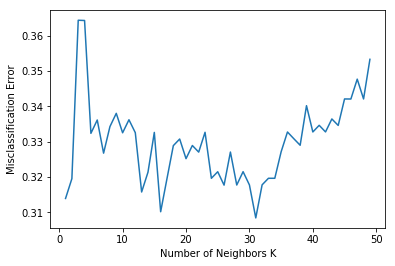

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from parser import load_split_all

def knn_classifier():
    
    knn = KNeighborsClassifier(n_neighbors=18)
    x_train, X_test, y_train, Y_test = load_split_all()
    
    cv_scores = []
    neighbors = list(range(1,50))
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    print cv_scores
#     determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print "The optimal number of neighbors is %d" % optimal_k
    print MSE.index(min(MSE))
    print "Optimal score is " + str(max(cv_scores))
#     plot misclassification error vs k
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
knn_classifier()